<a href="https://colab.research.google.com/github/GODxFATHER/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

# **Importing Libraries **

In [5]:
# Importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [6]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (13, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

# Loading The Dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Loading the dataset in pandas 
path_n = '/content/drive/MyDrive/DATA_FILES/bank-full.csv'

df = pd.read_csv(path_n)#, encoding = "latin")

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

> **y - has the client subscribed a term deposit? (binary: 'yes','no')**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

> **It looks like there are mo missing feature values.**

> **Let's explore how the features relate to the label by creating some box charts.**

In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# **EDA on Fearures**

In [14]:
sd_label = 'y'

In [15]:
num_f = df.describe().columns.to_list()
num_f

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [16]:
cat_f = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
print(cat_f)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [17]:
for col in cat_f:
  # sns.boxplot(x =df[col] , y = df['y'] )
  # plt.title(col)
  print(df[col].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


In [18]:
# for col in num_f:

#   plt.figure(figsize=(19,4))

#   plt.subplot(1,2,1)
#   # plt.figure(figsize=(5,4))
#   sns.boxplot(x = 'y', y = col, data = df,palette="Set2")
#   plt.title(col+' boxplot')

#   plt.subplot(1,2,2)
#   sns.histplot(x = df[col], hue= df['y'])#, kde=True)
#   plt.title(col+' distplot')

#   plt.show()

From the boxplot 

# Prepare the data

# Split the data

In [19]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [20]:
df.y = df.y.apply(lambda x: 1 if x=='yes' else 0)

In [21]:
df_features = df.drop(columns='y')
df_label = df.y

In [22]:
df_features.head(3)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown


In [23]:
df_label.unique()

array([0, 1])

In [24]:
num_f = df_features.describe().columns.to_list()
num_f

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [25]:
cat_f = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
print(cat_f)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [26]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer


full_pipeline = ColumnTransformer([
                                   
                                   ('std_scaler', StandardScaler(), num_f),
                                   ('cat', OneHotEncoder(), cat_f)
        ])
df_prepared = full_pipeline.fit_transform(df_features)

In [27]:
pd.DataFrame(df_prepared).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
X = df_prepared
y = df_label 

# Train

In [29]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [30]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
log_reg = LogisticRegression(C=1/reg, solver="liblinear")
model = log_reg.fit(X_train, y_train)
print(model)

LogisticRegression(C=100.0, solver='liblinear')


In [31]:
pred_X_test = model.predict(X_test)
# print('Predicted labels: ', pred_X_test)
# print('Actual labels:    ' ,y_test)

In [32]:
from sklearn. metrics import classification_report

print(classification_report(y_test, pred_X_test))

              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, pred_X_test))
print("Overall Precision:",precision_score(y_test, pred_X_test, average='macro'))
print("Overall Recall:",recall_score(y_test, pred_X_test, average='macro'))

Overall Accuracy: 0.8987061815769103
Overall Precision: 0.7844653946134418
Overall Recall: 0.6580989719250425


In [34]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test, pred_X_test)
print(mcm)

[[7755  197]
 [ 719  372]]


In [35]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.99189752 0.00810248]
 [0.96828114 0.03171886]
 [0.80932081 0.19067919]
 ...
 [0.98429498 0.01570502]
 [0.99256921 0.00743079]
 [0.96360477 0.03639523]]


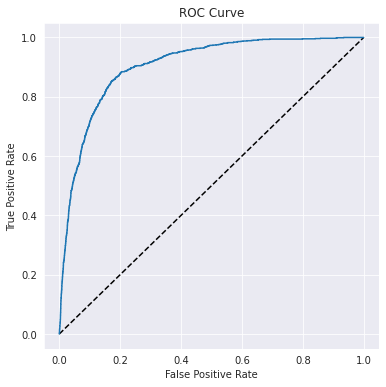

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [37]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.904543668979966


In [165]:
def print_model(algo,X_train, X_test, y_train, y_test):
  
  print(algo)
  
  #model fir
  model =algo.fit(X_train, y_train)
  #model predection
  pred_X_test = model.predict(X_test)

  #print classification report
  print('classification report')
  print(classification_report(y_test, pred_X_test))
  print("   ")

  #print accuracy score,precision score,recall score
  print("score")
  print("Overall Accuracy:",accuracy_score(y_test, pred_X_test))
  print("Overall Precision:",precision_score(y_test, pred_X_test, average='macro'))
  print("Overall Recall:",recall_score(y_test, pred_X_test, average='macro'))
  print("   ")
  
  # Print the confusion matrix
  mcm = confusion_matrix(y_test, pred_X_test)
  print('confusion matrix')
  print(mcm)
  print("   ")
  print("   ")

  #probability of 0 & 1
  if algo == sv_cls :
    # print("if")
  else:
    # print("else")
    y_scores = model.predict_proba(X_test)

 
    # calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))

    # Plot the diagonal 50% line
    plt.plot([0, 1], [0, 1], 'k--')

    # Plot the FPR and TPR achieved by our model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    print("   ")

    #print area under curve
    auc = roc_auc_score(y_test,y_scores[:,1])
    print('area under the curve')
    print('AUC: ' + str(auc)) 


In [161]:
def print_model(algo,X_train, X_test, y_train, y_test):
  #probability of 0 & 1
  print(algo)
  if algo == sv_cls :
    print("if")
  else:
    print("else")
  type(algo)

In [157]:
sv_cls

SVC(gamma='auto')

In [166]:
from sklearn.svm import SVC
sv_cls = SVC(gamma='auto')

print_model(sv_cls,X_train, X_test, y_train, y_test)

SVC(gamma='auto')
classification report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.66      0.28      0.39      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043

   
score
Overall Accuracy: 0.8956098639831914
Overall Precision: 0.7826969073457067
Overall Recall: 0.6310316643214005
   
confusion matrix
[[7791  161]
 [ 783  308]]
   
   
if


LogisticRegression(C=100.0, solver='liblinear')
classification report
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043

   
score
Overall Accuracy: 0.8987061815769103
Overall Precision: 0.7844653946134418
Overall Recall: 0.6580989719250425
   
confusion matrix
[[7755  197]
 [ 719  372]]
   
   
else


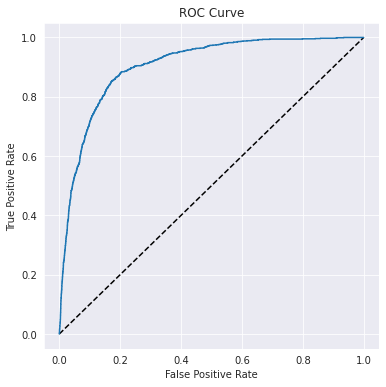

   
area under the curve
AUC: 0.904543668979966


In [167]:
print_model(log_reg,X_train, X_test, y_train, y_test)

In [164]:
from sklearn.neighbors import KNeighborsClassifier
knn_cls = KNeighborsClassifier(n_neighbors=3)

print_model(knn_cls,X_train, X_test, y_train, y_test)

KNeighborsClassifier(n_neighbors=3)
else


In [120]:
svc